In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn

In [11]:
sample2=pd.read_csv(r"C:\Users\Admin\Downloads\Iris.csv")

In [12]:
sample2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
sample2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

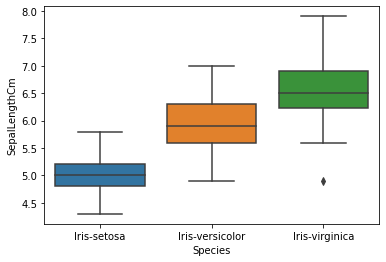

In [27]:
sns.boxplot(x='Species', y='SepalLengthCm', data=sample2)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

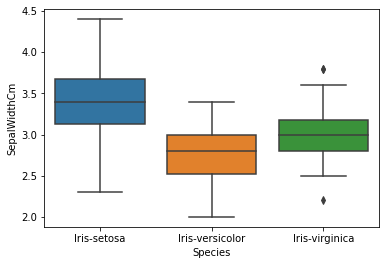

In [28]:
sns.boxplot(x='Species', y='SepalWidthCm', data=sample2)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

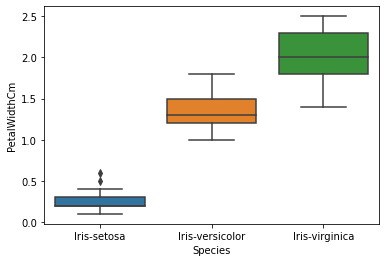

In [29]:
sns.boxplot(x='Species', y='PetalWidthCm', data=sample2)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

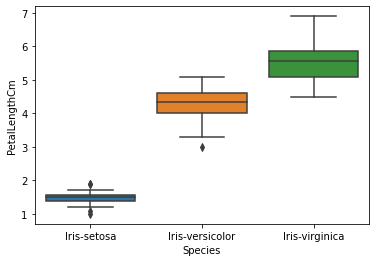

In [30]:
sns.boxplot(x='Species', y='PetalLengthCm', data=sample2)

In [36]:
df=sample2[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]

In [37]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

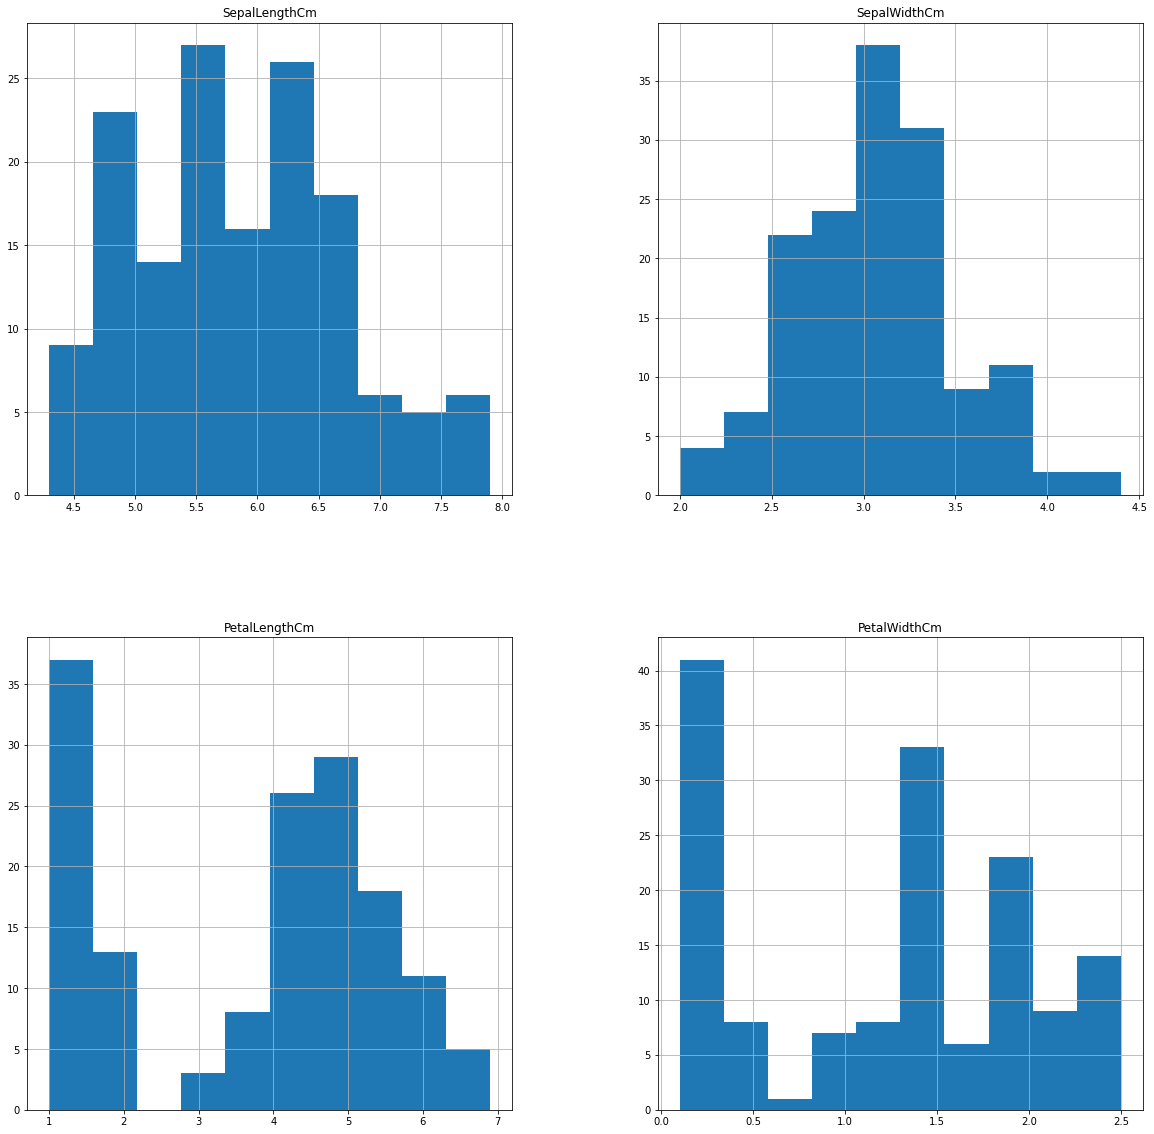

In [38]:
df.hist(figsize=(20,20))

In [40]:
sample2.drop('Id', axis='columns', inplace=True)

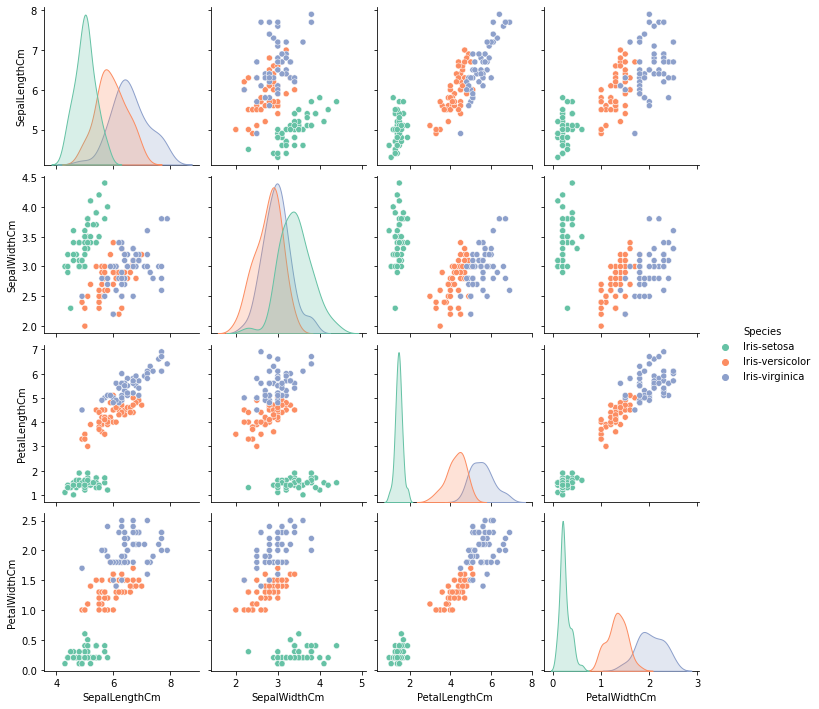

In [41]:
sns.pairplot(data=sample2,hue="Species",palette="Set2")
plt.show()

In [ ]:
features = sample2.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=99)    

In [45]:
#I will use ELBOW RULE, which is basically looking for a plot line that respectively has a slope nearest to 90 degrees compared to y axis and be smallest possible. (yes, looks like an elbow )
from sklearn.cluster import KMeans
wcss = []


In [47]:
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

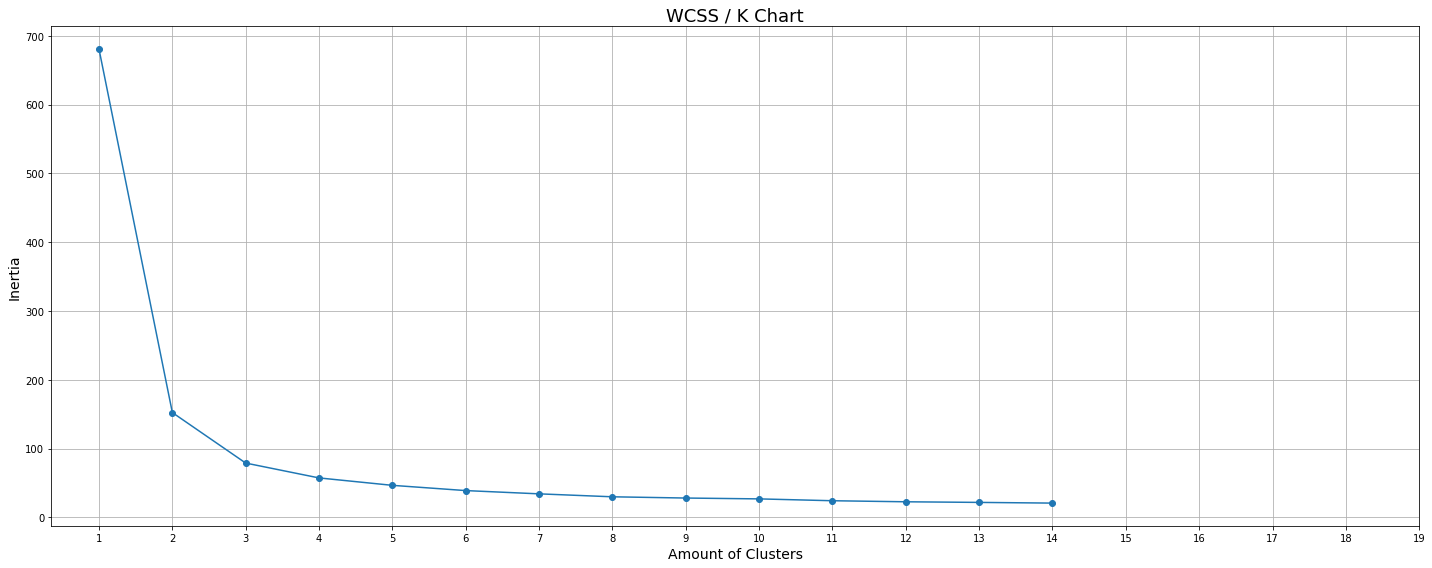

In [48]:
plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

In [49]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)

Text(0.5, 0.98, 'K Means Clustering')

<Figure size 1728x288 with 0 Axes>

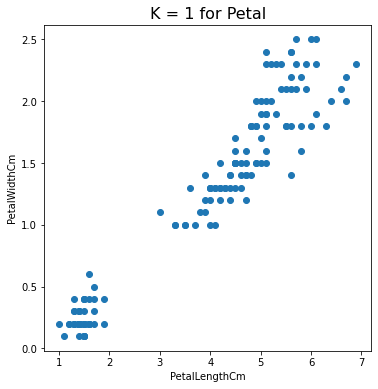

In [114]:
plt.figure(figsize=(34,6))
plt.subplot(1,5,1)
plt.title("K = 1 for Petal",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)

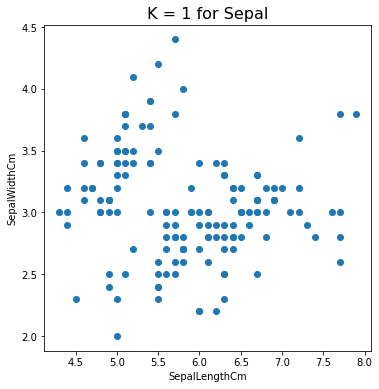

In [113]:
plt.figure(figsize=(34,6))
plt.subplot(1,5,1)
plt.title("K = 1 for Sepal",fontsize=16)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.scatter(features.SepalLengthCm,features.SepalWidthCm)

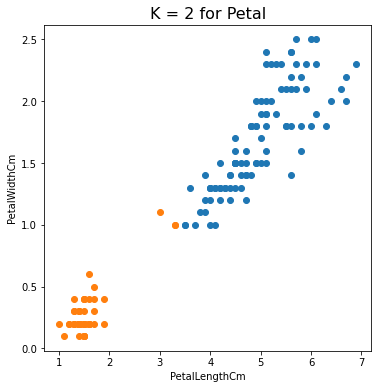

In [112]:
#Petal
plt.figure(figsize=(34,6))
plt.subplot(1,5,2)
plt.title("K = 2 for Petal",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

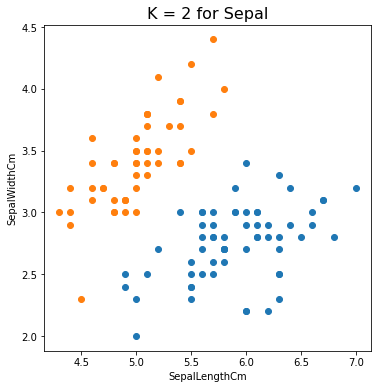

In [111]:
plt.figure(figsize=(34,6))
plt.subplot(1,5,2)
plt.title("K = 2 for Sepal",fontsize=16)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])

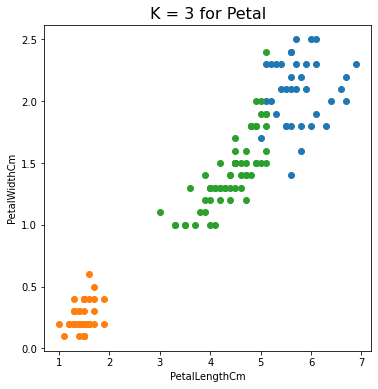

In [110]:
# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)
plt.figure(figsize=(34,6))
plt.subplot(1,5,4)
plt.title("K = 3 for Petal",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

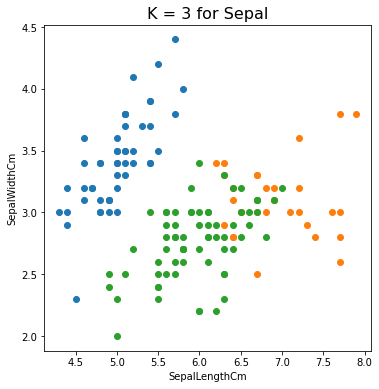

In [109]:
plt.figure(figsize=(34,6))
plt.subplot(1,5,2)
plt.title("K = 3 for Sepal",fontsize=16)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])


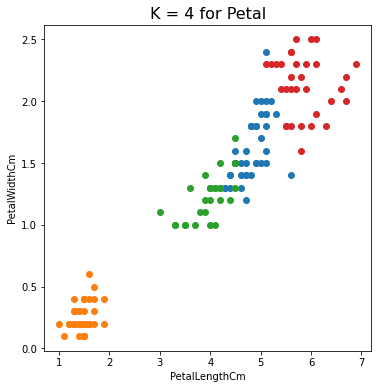

In [108]:
# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)
plt.figure(figsize=(34,6))
plt.subplot(1,5,3)
plt.title("K = 4 for Petal",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

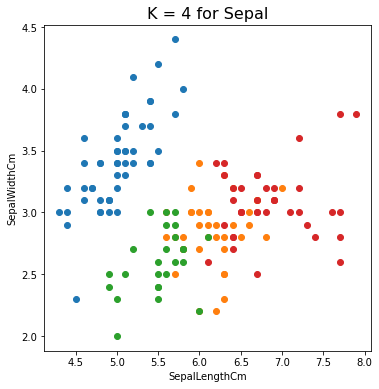

In [107]:
plt.figure(figsize=(34,6))
plt.subplot(1,5,2)
plt.title("K = 4 for Sepal",fontsize=16)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])
plt.scatter(features.SepalLengthCm[features.labels == 3],features.SepalWidthCm[features.labels == 3])


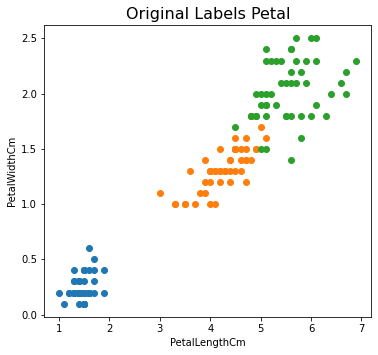

In [106]:
# I drop labels since we only want to use features.
#features.drop(["labels"],axis=1,inplace=True)
plt.figure(figsize=(34,6))
plt.subplot(1,5,5)
plt.title("Original Labels Petal",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(sample2.PetalLengthCm[sample2.Species == "Iris-setosa"],sample2.PetalWidthCm[sample2.Species == "Iris-setosa"])
plt.scatter(sample2.PetalLengthCm[sample2.Species == "Iris-versicolor"],sample2.PetalWidthCm[sample2.Species == "Iris-versicolor"])
plt.scatter(sample2.PetalLengthCm[sample2.Species == "Iris-virginica"],sample2.PetalWidthCm[sample2.Species == "Iris-virginica"])
plt.subplots_adjust(top=0.8)
plt.show()

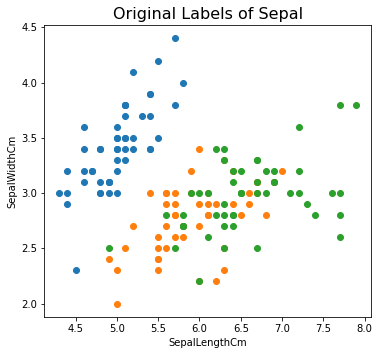

In [105]:
plt.figure(figsize=(34,6))
plt.subplot(1,5,5)
plt.title("Original Labels of Sepal",fontsize=16)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.scatter(sample2.SepalLengthCm[sample2.Species == "Iris-setosa"],sample2.SepalWidthCm[sample2.Species == "Iris-setosa"])
plt.scatter(sample2.SepalLengthCm[sample2.Species == "Iris-versicolor"],sample2.SepalWidthCm[sample2.Species == "Iris-versicolor"])
plt.scatter(sample2.SepalLengthCm[sample2.Species == "Iris-virginica"],sample2.SepalWidthCm[sample2.Species == "Iris-virginica"])
plt.subplots_adjust(top=0.8)
plt.show()

In [67]:
from sklearn.cluster import AgglomerativeClustering
hc_cluster = AgglomerativeClustering(n_clusters=99)

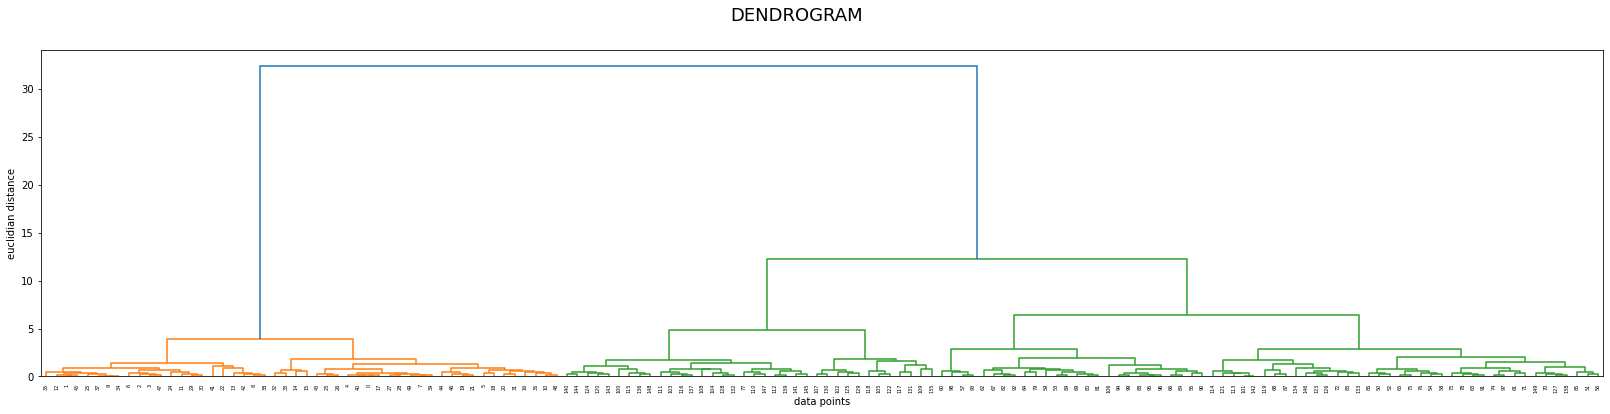

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage

merg = linkage(features,method="ward")

plt.figure(figsize=(28,6))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidian distance")

plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

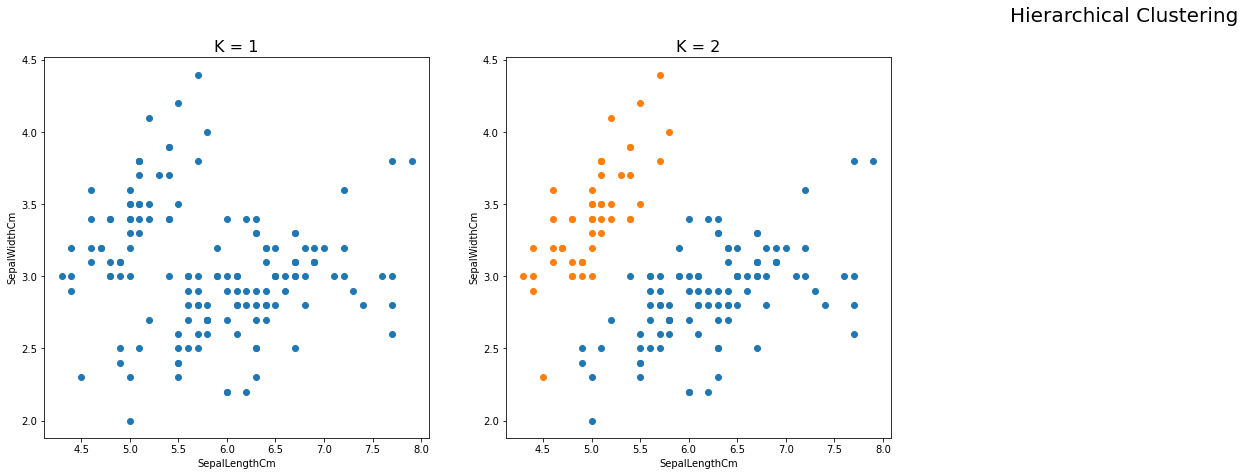

In [116]:
plt.figure(figsize=(40,7))

plt.suptitle("Hierarchical Clustering",fontsize=20, ha= "center")

plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.scatter(features.SepalLengthCm,features.SepalWidthCm)
plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
hc_cluster = AgglomerativeClustering(n_clusters=2)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])




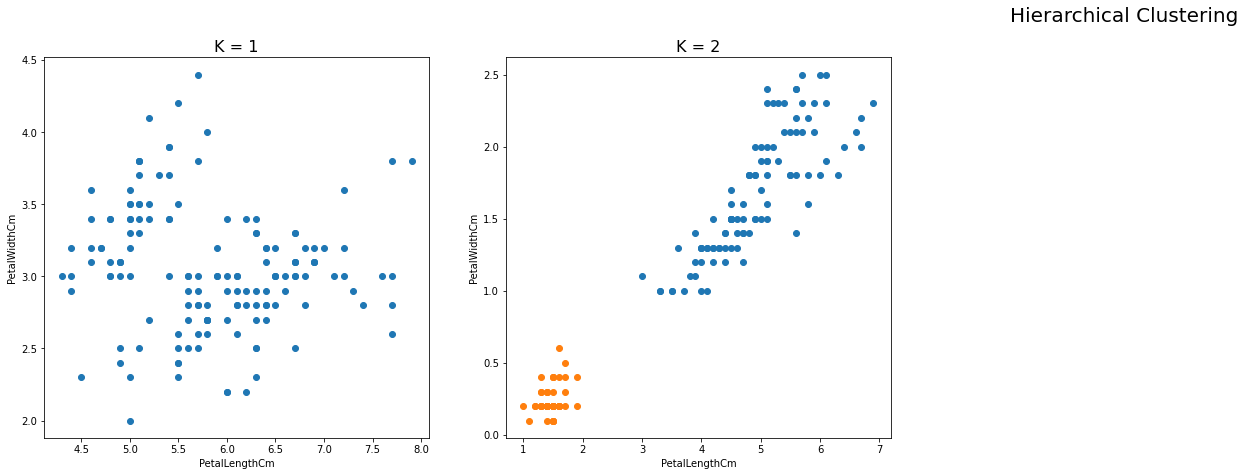

In [119]:
plt.figure(figsize=(40,7))

plt.suptitle("Hierarchical Clustering",fontsize=20, ha= "center")

plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.SepalLengthCm,features.SepalWidthCm)
plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
hc_cluster = AgglomerativeClustering(n_clusters=2)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])


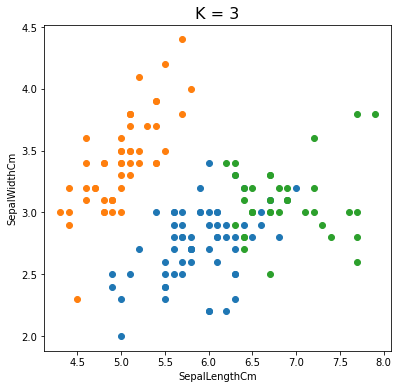

In [117]:
# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)
plt.figure(figsize=(36,6))
plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
hc_cluster = AgglomerativeClustering(n_clusters=3)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])


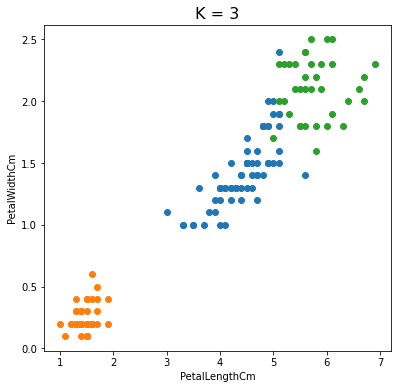

In [120]:
plt.figure(figsize=(36,6))
plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
hc_cluster = AgglomerativeClustering(n_clusters=3)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])


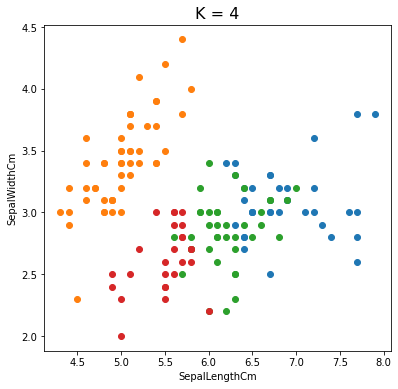

In [118]:
# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)
plt.figure(figsize=(36,6))
plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
hc_cluster = AgglomerativeClustering(n_clusters=4)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])
plt.scatter(features.SepalLengthCm[features.labels == 3],features.SepalWidthCm[features.labels == 3])

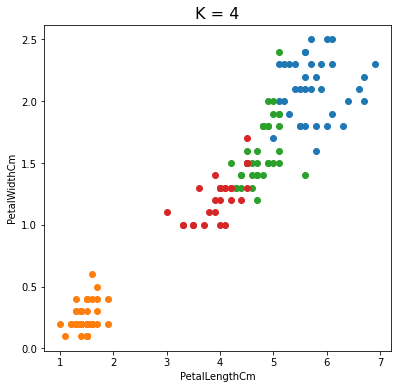

In [121]:
plt.figure(figsize=(36,6))
plt.subplot(1,5,4)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
hc_cluster = AgglomerativeClustering(n_clusters=4)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])


In [122]:
# I drop labels since we only want to use features.
#features.drop(["labels"],axis=1,inplace=True)
# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)
# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"Species":sample2['Species']})
ct1 = pd.crosstab(df1['labels'],df1['Species'])
# hierarchy
hc_cluster = AgglomerativeClustering(n_clusters=3)
hc_predict = hc_cluster.fit_predict(features)
# cross tabulation table for Hierarchy
df2 = pd.DataFrame({'labels':hc_predict,"Species":sample2['Species']})
ct2 = pd.crosstab(df2['labels'],df2['Species'])



<AxesSubplot:title={'center':'KMeans'}, xlabel='Species', ylabel='labels'>

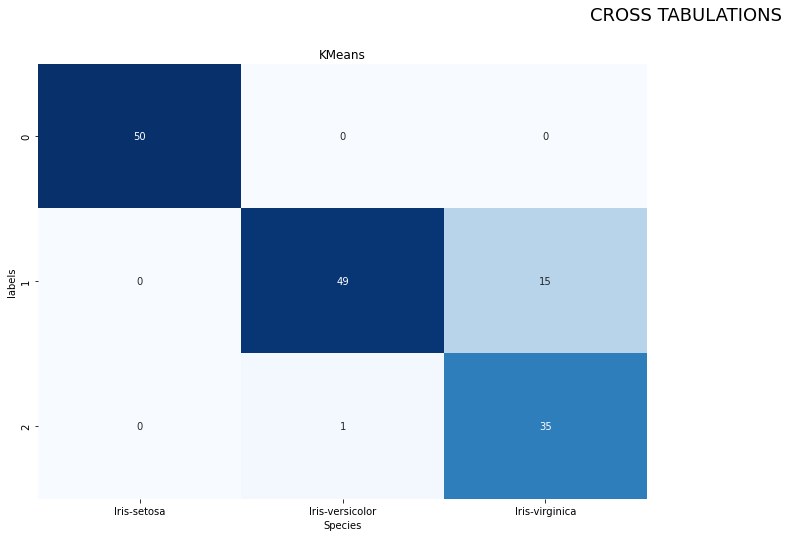

In [123]:
plt.figure(figsize=(24,8))
plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")


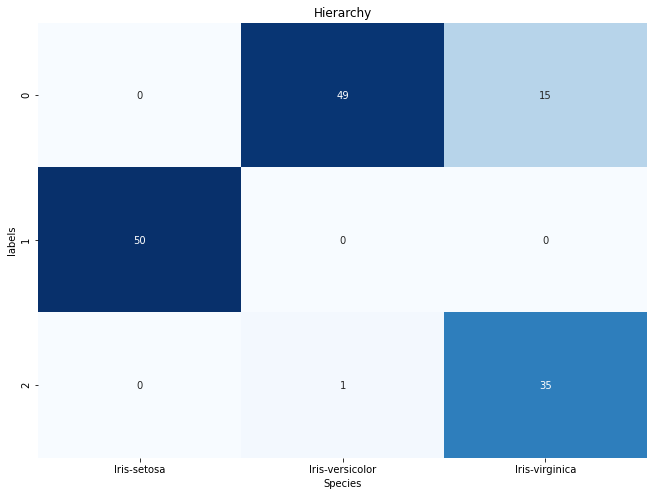

In [90]:
plt.figure(figsize=(24,8))
plt.subplot(1,2,2)
plt.title("Hierarchy")
sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues")

plt.show()